In [185]:
import numpy as np 
import pandas as pd 


In [186]:
data = pd.read_csv('quikr_car.csv')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [187]:
data.shape


(892, 6)

In [188]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [189]:
data['kms_driven_numeric'] = (
    data['kms_driven']
    .str.replace(',', '', regex=True)
    .str.extract('(\d+)')
    
)
data.drop('kms_driven', axis=1, inplace=True)
data.head()


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mahes\AppData\Local\Temp\ipykernel_21224\117226863.py:4: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


,name,company,year,Price,fuel_type,kms_driven_numeric
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",Petrol,45000
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",Diesel,40
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,22000
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,28000
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",Diesel,36000


In [190]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data['kms_driven_numeric'] = imputer.fit_transform(data[['kms_driven_numeric']])
data.isnull().sum()

name                   0
company                0
year                   0
Price                  0
fuel_type             55
kms_driven_numeric     0
dtype: int64

In [191]:
data['fuel'] = data['fuel_type'].fillna(data['fuel_type'].mode())

data.dropna(inplace=True)

data['fuel'].isnull().sum()

np.int64(0)

In [192]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 2. One-hot encode fuel column
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
fuel_encoded = encoder.fit_transform(data[['fuel']])

# 3. Convert to DataFrame
fuel_encoded_df = pd.DataFrame(
    fuel_encoded,
    columns=encoder.get_feature_names_out(['fuel']),
    index=data.index
)

# 4. Drop original fuel column and add encoded columns
df = pd.concat([data.drop(columns=['fuel']), fuel_encoded_df], axis=1)

print(df.head())


                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

  fuel_type  kms_driven_numeric  fuel_Diesel  fuel_LPG  fuel_Petrol  
0    Petrol             45000.0          0.0       0.0          1.0  
1    Diesel                40.0          1.0       0.0          0.0  
2    Petrol             22000.0          0.0       0.0          1.0  
3    Petrol             28000.0          0.0       0.0          1.0  
4    Diesel             36000.0          1.0       0.0          0.0  


In [193]:
data['fuel'].unique()


array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [194]:
data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [195]:
data.head(20)

,name,company,year,Price,fuel_type,kms_driven_numeric,fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",Petrol,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",Diesel,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",Diesel,36000.0,Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,Diesel,59000.0,Diesel
6,Ford Figo,Ford,2012,"1,75,000",Diesel,41000.0,Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000",Petrol,25000.0,Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000",Diesel,24530.0,Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000",Petrol,60000.0,Petrol


In [196]:
data['kms_driven_numeric'] = data['kms_driven_numeric'].astype(int)


In [197]:
data.head()

,name,company,year,Price,fuel_type,kms_driven_numeric,fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",Petrol,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",Diesel,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",Diesel,36000,Diesel


In [198]:
data.describe()

,kms_driven_numeric
count,837.000000
mean,46034.457587
std,34483.283332
min,0.000000
25%,25000.000000
50%,41000.000000
75%,56450.000000
max,400000.000000


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                837 non-null    object
 1   company             837 non-null    object
 2   year                837 non-null    object
 3   Price               837 non-null    object
 4   fuel_type           837 non-null    object
 5   kms_driven_numeric  837 non-null    int64 
 6   fuel                837 non-null    object
dtypes: int64(1), object(6)
memory usage: 52.3+ KB


In [200]:
df.select_dtypes(include='object').columns


Index(['name', 'company', 'year', 'Price', 'fuel_type'], dtype='object')

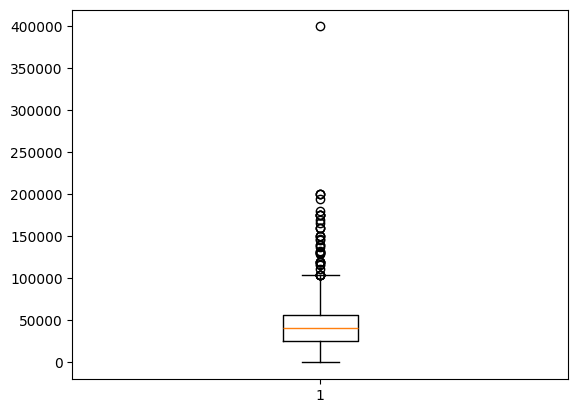

In [201]:
import matplotlib.pyplot as plt

plt.boxplot(data['kms_driven_numeric'] )
plt.show()

In [202]:
Q1 = df['kms_driven_numeric'].quantile(0.25)
Q3 = df['kms_driven_numeric'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['kms_driven_numeric'] < lower_bound) | (df['kms_driven_numeric'] > upper_bound)]
print(outliers)


                                            name    company  year  \
62                  Tata Indigo eCS LS CR4 BS IV       Tata  2017   
64                  Tata Indigo eCS LS CR4 BS IV       Tata  2017   
121                      Maruti Suzuki Dzire VDI     Maruti  2015   
139                  Hindustan Motors Ambassador  Hindustan  2000   
183                Tata Indigo eCS LX TDI BS III       Tata  2016   
237                Tata Indigo eCS LX TDI BS III       Tata  2016   
238                Tata Indigo eCS LX TDI BS III       Tata  2016   
283                Tata Indigo eCS LX TDI BS III       Tata  2016   
303  Mahindra Scorpio VLX Special Edition BS III   Mahindra  2004   
313                    Mahindra Scorpio 2.6 CRDe   Mahindra  2007   
362                Honda City 1.5 V MT Exclusive      Honda  2010   
379           Maruti Suzuki Swift Dzire Tour LDi     Maruti  2016   
397                    Tata Indigo LX TDI BS III       Tata  2016   
426           Maruti Suzuki Swift 

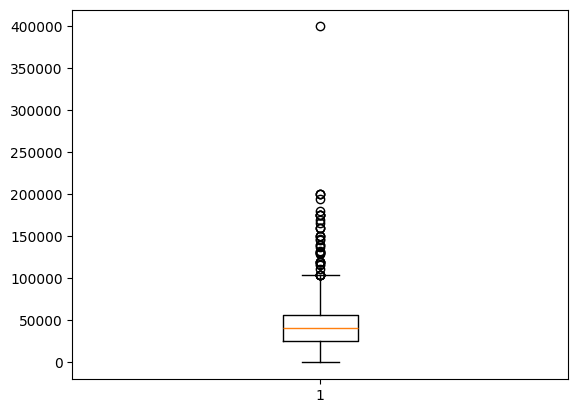

In [203]:
plt.boxplot(data['kms_driven_numeric'] )
plt.show()

# abhi tak maine self kara but av video se 
--------------------------------------------------


# year has non year values ✅
# year object to int
# prices has askprice value 
# price object to int
# kms has  kms string and in int 
# remove nan values 
# keep 3 words of car names 


In [204]:
data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [205]:
data['year'] = data['year'].astype(int)

In [206]:
data['Price'] = data['Price'].str.replace(',', '', regex=True)
data['Price']


0              80000
1             425000
2      Ask For Price
3             325000
4             575000
           ...      
883           270000
885           110000
886           300000
888           260000
889           390000
Name: Price, Length: 837, dtype: object

In [207]:
data = data[data['Price'] != 'Ask For Price']
data.head()

,name,company,year,Price,fuel_type,kms_driven_numeric,fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,Petrol,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,Diesel,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,Petrol,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,Diesel,36000,Diesel
6,Ford Figo,Ford,2012,175000,Diesel,41000,Diesel


In [208]:
data['Price'] = data['Price'].astype(int)
data.head()
data['Price'].dtypes

dtype('int64')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                816 non-null    object
 1   company             816 non-null    object
 2   year                816 non-null    int64 
 3   Price               816 non-null    int64 
 4   fuel_type           816 non-null    object
 5   kms_driven_numeric  816 non-null    int64 
 6   fuel                816 non-null    object
dtypes: int64(3), object(4)
memory usage: 51.0+ KB


In [210]:
data.isnull().sum()

name                  0
company               0
year                  0
Price                 0
fuel_type             0
kms_driven_numeric    0
fuel                  0
dtype: int64

In [211]:
data.drop('fuel_type', axis=1, inplace=True)

In [212]:
data.head()

,name,company,year,Price,kms_driven_numeric,fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [213]:
data['kms_driven_numeric'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        24330,  65480, 200000,  59000,  99000,   2800,  21000,  11000,
        66000,   3000,   7000,  38500,  37200,  43200,  24800,  45872,
        40000,  11400,  97200,  52000,  31000, 175430,  37000,  65000,
         3350,  75000,  62000,  73000,   2200,  54870,  34580,  97000,
           60,  80200,   3200,      0,   5000,    588,  71200, 175400,
         9300,  56758,  10000,  56450,  56000,  32700,   9000,     73,
      

In [214]:
data['name'] = data['name'].str.split().str.slice(0,3).str.join(' ')

In [215]:
data ['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [216]:
data.reset_index(drop=True, inplace=True)

In [217]:
data.head()

,name,company,year,Price,kms_driven_numeric,fuel
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [218]:
data.rename(columns={'kms_driven_numeric': 'kms'}, inplace=True)


In [219]:
data.head()

,name,company,year,Price,kms,fuel
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [221]:
data.describe()

,year,Price,kms
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [222]:
data = data[data['Price'] < 6e6].reset_index(drop=True)

In [223]:
data

,name,company,year,Price,kms,fuel
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [224]:
data.to_csv('car' , index=False)

In [235]:
dataf = pd.read_csv('car')

In [236]:
dataf

,name,company,year,Price,kms,fuel
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel
